In [ ]:
!pip install h2o
!pip install autogluon
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import h2o
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import autogluon as ag
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from h2o.automl import H2OAutoML
from pycaret.regression import *
from autogluon.tabular import TabularPredictor

## Loading data


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/airline_passenger_satisfaction.csv')
pd.set_option('display.max_columns', None) # показывает все столбцы на экране
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
#удаляем столбец ID
df.drop(columns='ID', inplace= True)
df.head(5) # 5 ряд

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.shape

(129880, 23)

In [ ]:
df.describe().round(2)

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.00,129880.00,129880.00,129487.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,39.43,1190.32,14.71,15.09,3.06,2.76,3.31,3.25,2.98,3.38,3.44,3.35,3.29,3.20,3.64,2.73,3.36,3.63
std,15.12,997.45,38.07,38.47,1.53,1.40,1.27,1.35,1.28,1.29,1.32,1.32,1.31,1.33,1.18,1.33,1.33,1.18
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,27.00,414.00,0.00,0.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00
50%,40.00,844.00,0.00,0.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00
75%,51.00,1744.00,12.00,13.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00
max,85.00,4983.00,1592.00,1584.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [ ]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


## Data Cleaning(в этом разделе вычесляем отс значения и ихм значения)


In [ ]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [ ]:
 # у ряда -Arrival Delay)кол-во 393) отсутс значение,то есть не нулевый
df['Arrival Delay']

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [ ]:
# находим средн значение в Arrival Delay и заменим отсутсв значения
df['Arrival Delay'].mean()

15.091128839188494

In [ ]:
df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

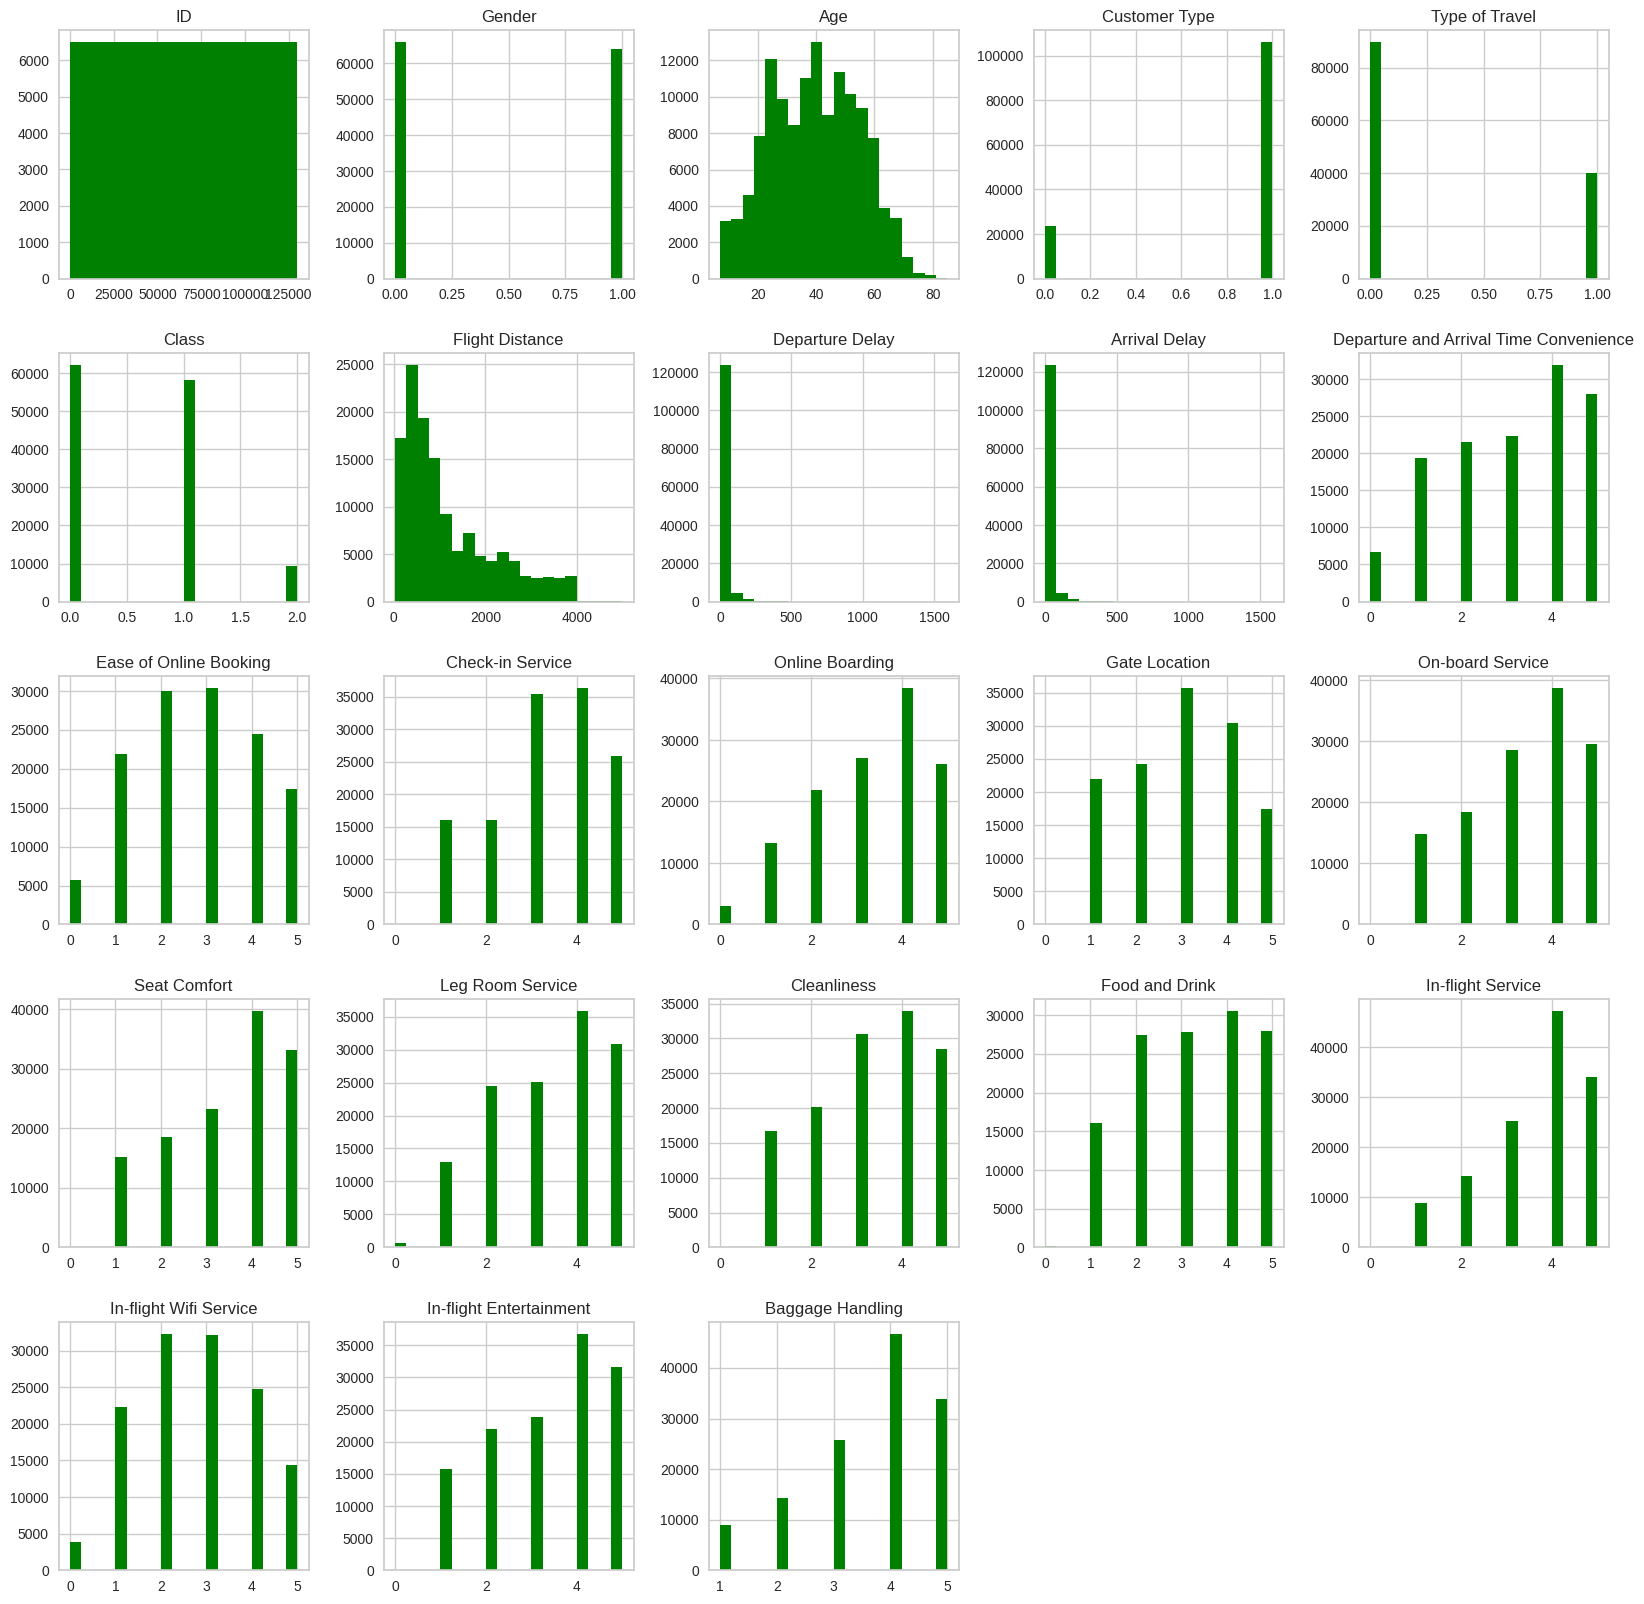

In [ ]:
df.hist(bins=20, figsize=(20, 20), color='green')
plt.show()

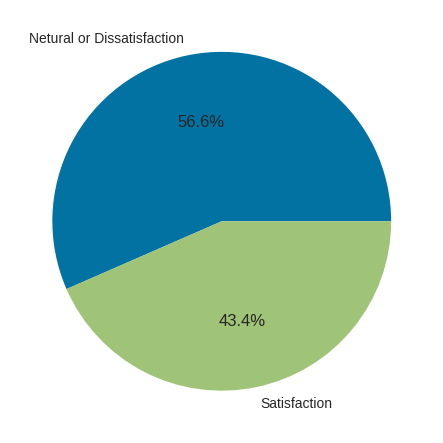

In [ ]:
# получаем в диагр посл столбец Satisfaction (Удовлетворение)
plt.pie(df['Satisfaction'].value_counts(), labels=['Netural or Dissatisfaction', 'Satisfaction'], autopct='%1.1f%%')
plt.show()

## Column Data Encoding


In [ ]:
df.select_dtypes(include='object').columns

Index(['Satisfaction'], dtype='object')

In [ ]:
df['Gender'].unique()



array([1, 0])

In [ ]:
df['Class'].unique()

array([0, 1, 2])

In [ ]:
df['Customer Type'].unique()

array([0, 1])

In [ ]:
df['Type of Travel'].unique()

array([0, 1])

In [ ]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [ ]:
# #ручная кодировка
# df.replace({
#     'Gender':{
#         'Male': 1,
#         'Female': 2
#     },
#     'Customer Type':{
#         'First-time': 1,
#         'Returning': 2
#     },
#     'Type of Travel':{
#         'Business': 1,
#         'Personal': 2
#     },
#     'Class':{
#         'Business': 1,
#         'Economy': 2,
#         'Economy Plus': 3
#     }

# }, inplace=True)
# df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,1,1,1,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,2,35,2,1,1,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,1,41,2,1,1,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,1,50,2,1,1,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,2,49,2,1,1,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.dtypes

In [ ]:
label_encoder = LabelEncoder()

columns = df.select_dtypes(include='object').drop(columns='Satisfaction').columns


for column in columns:
  df[column] = label_encoder.fit_transform(df[column])
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


## Models


In [ ]:
X =df.drop(columns='Satisfaction')
X.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3
3,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5
4,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3


In [ ]:
df.dtypes

ID                                          int64
Gender                                      int64
Age                                         int64
Customer Type                               int64
Type of Travel                              int64
Class                                       int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [ ]:
y = df['Satisfaction']
y.head()

0    Neutral or Dissatisfied
1                  Satisfied
2                  Satisfied
3                  Satisfied
4                  Satisfied
Name: Satisfaction, dtype: object

### Decision Tree(делим на тренров и тест модели)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
# model.fit(X, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.2) #делили - тут 80% train, 20%- test
# X_train - тренировочная модель
# X_test - тестир модель
# X = X_train + X_test

X.shape


(129880, 22)

In [ ]:
X_train.shape


(25976, 22)

In [ ]:
X_test.shape

(103904, 22)

In [ ]:
#тренируем модель на основ тренировочн данных
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#создаем модел predict и передаем ему X_test
predictions = model.predict(X_test)
predictions
# poluchsem odnomernyi massiv

array(['Satisfied', 'Satisfied', 'Neutral or Dissatisfied', ...,
       'Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       'Neutral or Dissatisfied'], dtype=object)

In [ ]:
# vyzyvaem func accuracy_score i peredaem y_test i predictions
model_score = accuracy_score(y_test, predictions)
model_score
# tocnost modeli - 93.68%

0.9383373113643363

### Random Forest

In [ ]:
model = RandomForestClassifier()



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.2) #делили - тут 80% train, 20%- test
model.fit(X_train, y_train)
# X_train - тренировочная модель
# X_test - тестир модель
# X = X_train + X_test

#создаем модел predict и передаем ему X_test
predictions = model.predict(X_test)
predictions  # poluchsem odnomernyi massiv


# vyzyvaem func accuracy_score i peredaem y_test i predictions
model_score = accuracy_score(y_test, predictions)
model_score
# tocnost modeli - 95,79%



0.9579419464120726

### KneighborsClassiffier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()


X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.2) #делили - тут 80% train, 20%- test
model.fit(X_train, y_train)
# X_train - тренировочная модель
# X_test - тестир модель
# X = X_train + X_test

#создаем модел predict и передаем ему X_test
predictions = model.predict(X_test)
predictions  # poluchsem odnomernyi massiv


# vyzyvaem func accuracy_score i peredaem y_test i predictions
model_score = accuracy_score(y_test, predictions)
model_score
# tocnost modeli - 64,36%


0.6436614567292885

### logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = LogisticRegression()


X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.2) #делили - тут 80% train, 20%- test
model.fit(X_train, y_train)
# X_train - тренировочная модель
# X_test - тестир модель
# X = X_train + X_test

#создаем модел predict и передаем ему X_test
predictions = model.predict(X_test)
predictions  # poluchsem odnomernyi massiv


# vyzyvaem func accuracy_score i peredaem y_test i predictions
model_score = accuracy_score(y_test, predictions)
model_score
# tocnost modeli - 64,36%

0.6329111487526948

##Random Forest and Boosting


In [ ]:
# Предобработка данных

#Кодирование категориальных признаков
encoder = LabelEncoder()
encoder.fit_transform(df['Customer Type']) #Преобразует категориальные значения в столбце 'Customer Type' в числовые значения.

encoder.fit_transform(df['Type of Travel']) #Преобразует категориальные значения в столбце 'Type of Travel' в числовые значения.

encoder.fit_transform(df['Class']) #Преобразует категориальные значения в столбце 'Class' в числовые значения.

# Разделение на обучающий и тестовый наборы
X = df.drop('Satisfaction', axis=1)  # Признаки
y = df['Satisfaction']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Обучение модели градиентного бустинга
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Оценка производительности моделей
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Точность  (Random Forest):", accuracy_rf)
print("Точность  (Gradient Boosting):", accuracy_gb)


Точность  (Random Forest): 0.963543270711426
Точность  (Gradient Boosting): 0.9434477979673545


Исходя из результатов, модель случайного леса показывает немного более высокую точность, по сравнению с моделью градиентного бустинга

### H2O и загрузка в Flow

In [ ]:
# Инициализируем H2O-3
h2o.init(ip="localhost", port=54321)

In [ ]:
# Разделиv данные на обучающий и тестовый наборы
train, test = data.split_frame(ratios=[0.8], seed=42)

In [ ]:
# Загрузка CSV-файла
data = h2o.import_file("/content/drive/MyDrive/airline_passenger_satisfaction.csv")

# Вывод информации о загруженных данных
data.summary()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Prediction without Voting columns(без колонок отзыва пассажиров)

In [ ]:
X = df[['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay']]
X.head()


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,1,48,0,0,0,821,2,5.0
1,0,35,1,0,0,821,26,39.0
2,1,41,1,0,0,853,0,0.0
3,1,50,1,0,0,1905,0,0.0
4,0,49,1,0,0,3470,0,1.0


In [ ]:
y = df['Satisfaction']
y.head()

0    Neutral or Dissatisfied
1                  Satisfied
2                  Satisfied
3                  Satisfied
4                  Satisfied
Name: Satisfaction, dtype: object

In [ ]:
model = RandomForestClassifier()



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.2) #делили - тут 80% train, 20%- test
model.fit(X_train, y_train)
# X_train - тренировочная модель
# X_test - тестир модель
# X = X_train + X_test

#создаем модел predict и передаем ему X_test
predictions = model.predict(X_test)
predictions  # poluchsem odnomernyi massiv


# vyzyvaem func accuracy_score i peredaem y_test i predictions
model_score = accuracy_score(y_test, predictions)
model_score
# tocnost modeli - 77,45%



0.9572489990760702

#### Manual testing(Ручное тестирование)

In [ ]:
X.iloc[:0].to_dict()

{'Gender': {},
 'Age': {},
 'Customer Type': {},
 'Type of Travel': {},
 'Class': {},
 'Flight Distance': {},
 'Departure Delay': {},
 'Arrival Delay': {},
 'Satisfaction': {}}

In [ ]:
#параметры(цифры можно менять)
test_inputs = {
 'Gender': [1, 0],
 'Age': [35, 25],
 'Customer Type': [0, 1],
 'Type of Travel': [0, 0],
 'Class': [1, 1],
 'Flight Distance': [1200, 500],
 'Departure Delay': [0, 0],
 'Arrival Delay': [0, 0]
}
test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,500,0,0
